## Notebook 7A - Wed/Thurs
### Numerical calculations of Electric Fields, Flux & Gauss' Law Part I
#### PHYS 225 Intro to Computational Physics, Fall 2020

## Electric Field of a Point Charge 

In this lab we will write a function to calculate the electric field flux through the surface of a cube that is created by a point charge. 

# Task 1: Import stuff
This is super basic, but I want you to import `numpy` and `matplotlib.pyplot`.
1. Import numpy as np
2. Import matplotlib.pyplot as plt

In [7]:
""" Import numpy and matplotlib """

### BEGIN SOLUTION
import numpy as np
import matplotlib.pyplot as plt
### END SOLUTION

We are going to make all plots interactive using `%matplotlib notebook`. 

**Warning:** Make sure to call `plt.figure()` before each new plot or your interactive figures will display in the previous figure.

In [8]:
# we are going to make all plots interactive in this lab.
%matplotlib notebook

<IPython.core.display.Javascript object>


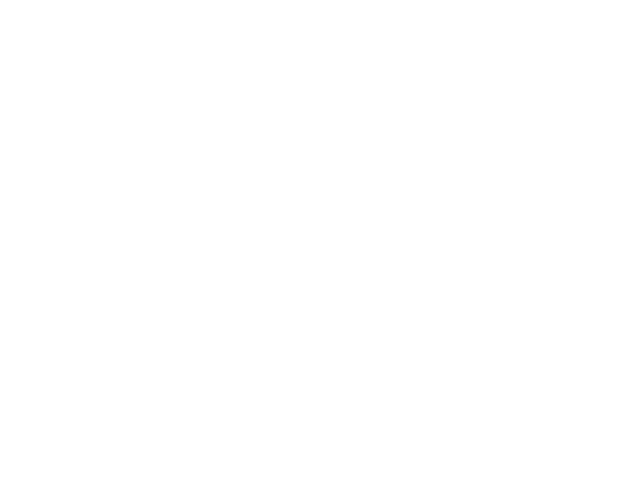

In [9]:
""" Test cases for Task 1 (importing) """
assert type( np.linspace(0,1,10) ) == np.ndarray
assert plt.xlabel("Happy")
plt.close()

# Task 2: Define a function for the electric field

$$\vec{E} = \frac{1}{4\pi\epsilon_0}\frac{q}{r^2}\hat{r}$$

**Function name:** `point_charge_field`

**Inputs:** 
* `x` x-coordinate to evaluate potential at (in meters)
* `y` y-coordinate to evaluate potential at (in meters)
* `z` z-coordinate to evaluate potential at (in meters)
* `xq` x-coordinate of the point charge (in meters)
* `yq` y-coordinate of the point charge (in meters)
* `zq` z-coordinate of the point charge (in meters)
* `q` value of the charge (in Coulombs)

**Outputs:**
* A list of the three field components `[Ex,Ey,Ez]` the electric potential (in J/m or N/C)

**Note** You can use your existing solution from PS6B, which defined the exact same function.

In [10]:
""" Define a function point_charge_field() function
Returns list of electric field values. """

### BEGIN SOLUTION
from scipy.constants import epsilon_0, e

def point_charge_field(x,y,z,xq,yq,zq,q) :
    
    r = ( (x-xq)**2 + (y-yq)**2 + (z-zq)**2 )**0.5
    Emag = 1/(4*np.pi*epsilon_0) * q * 1/r**2
    Ex =  Emag * (x-xq)/r
    Ey =  Emag * (y-yq)/r
    Ez =  Emag * (z-zq)/r
    
    return [Ex,Ey,Ez]

print( e )
print( point_charge_field(0,0,1,0,0,0, e) )
print( point_charge_field(1,2,3,10,-3,6, e) )
print( point_charge_field(-3,-3,-3,-2,-3,-3, e) )
print( point_charge_field(-3,-3,-3,-2,-3,-3, 4*e) )


print(type(point_charge_field(-1,3,6,-1,3,5, e)))
#print( point_charge_field(0,0,0,0,0,0,1))
### END SOLUTION

1.602176634e-19
[0.0, 0.0, 1.439964547842567e-09]
[-1.0508665026981781e-11, 5.838147237212101e-12, -3.5028883423272605e-12]
[-1.439964547842567e-09, 0.0, 0.0]
[-5.759858191370268e-09, 0.0, 0.0]
<class 'list'>


In [11]:
""" Test cases for the point_charge_potential() function"""
from scipy.constants import e  # electron charge  magnitude

def vector_error(studentresult, instructorresult) :
    studentvec = np.array(studentresult)
    instructorvec = np.array(instructorresult)
    error = np.linalg.norm(studentvec - instructorvec)/np.linalg.norm(instructorvec)
    return error
    

# force between two people shoudl be less than a micronewton.
studentresult = point_charge_field(0,0,1,0,0,0, e)
#print(result)

assert type(studentresult) == list  # check the type of the returned result is as-specified
assert len(studentresult) == 3  # check the length of the list output

# check if the force vector is very close to the test case calculation
instructorresult = [0.0, 0.0, 1.4399645351950547e-09]
assert vector_error(studentresult, instructorresult ) < 1e-5

# revese m1 and m2 values
studentresult = point_charge_field(1,2,3,10,-3,6, e)
instructorresult = [-1.050866493468196e-11, 5.838147185934422e-12, -3.5028883115606537e-12]
assert vector_error(studentresult, instructorresult ) < 1e-5


# shift positions of both masses by equal amounts
studentresult = point_charge_field(-3,-3,-3,-2,-3,-3, e)
instructorresult = [-1.4399645351950547e-09, 0.0, 0.0]
assert vector_error(studentresult, instructorresult ) < 1e-5

# change charge by 4x
studentresult = point_charge_field(-3,-3,-3,-2,-3,-3, 4*e)
instructorresult = [-5.759858140780219e-9, 0.0, 0.0]
assert vector_error(studentresult, instructorresult ) < 1e-5

del studentresult, instructorresult, vector_error

# Calculate the Flux Integral over a Surface

Electric flux is given by 

$$ \Phi_E = \int_\mathrm{surface} \vec{E}\cdot\widehat{n}\;dA $$

where $\widehat{n}$ is the unit normal vector to the surface.  

To integrate numerically, 

1. Evaluate the dot product numericaly at each point on the surface: $\vec{E}\cdot\widehat{n} = E_x n_x + E_y n_y + E_z n_z$
2. Multiply by the area of that rectangle of surface area: $d\Phi_E = \left(E_x n_x + E_y n_y + E_z n_z\right) dA$
3. Sum up all of the individual contributions: $\Phi_E = \int d\Phi_E$

The lecture notes from Friday of week 6 (PS6C_lecture.ipynb) have an example of this calculation.

## Task 3: Calculate Flux Through Top ($+z$ side) of a Cube

A cube has length 2 meters on a side and is centered on the origin. So the cube goes between $\pm 1 \textrm{ m}$ in $x$, $y$, and $z$. 

In this task you will:
* Generate position meshgrids for the cube's $+z$ top surface. Use at least 100x100 grids. Why do you only need two meshgrids?
* Generate the corresponding field meshgrids `Ex`, `Ey`, `Ez` using `E_point_charge` assuming a $75\;\mu\mathrm{C}$ charge at the origin.
* Calculate the total flux through the $+z$ surface and store the results in `phi_E_top`
* Additionally, make a contour plot of the flux meshgrid of $d\Phi$ values, which is the flux through each little rectangle $dA$.

![Example contour plot](Flux_contour_top.png)

**Reflection question:** Does it make sense that the magnitude of the flux at the corner of the cube is about 6x less than the flux in the middle?

1443455.5510303222


<IPython.core.display.Javascript object>


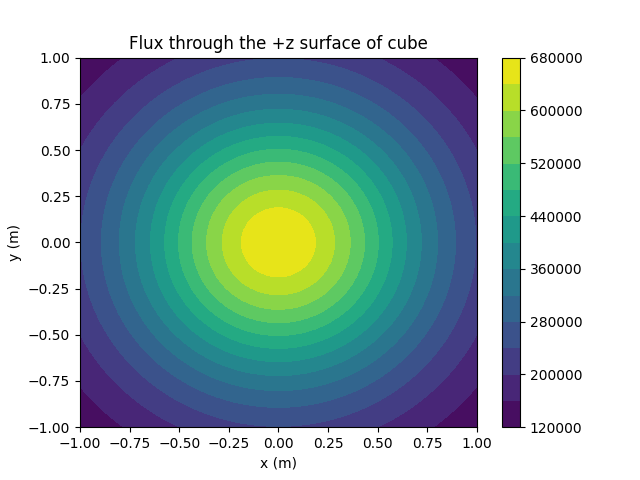

Text(0.5, 1.0, 'Flux through the +z surface of cube')

In [12]:
""" Calculate the here flux through top surface and make a contour plot """

# Define the meshgrid

# Evaluate the Electric field

# Calculate the flux over the meshgrid

# create a contour plot of the flux array

### BEGIN SOLUTION ###

Z = 1  # fixed x value (positive x face of cube)
xrange = np.linspace(-1, 1, 50)
yrange = np.linspace(-1, 1, 50)

X, Y = np.meshgrid(xrange, yrange)

# dA calculation
dx = xrange[1] - xrange[0]
dy = yrange[1] - yrange[0]
dA = dx * dy

# components of the normal vector
nx = 0
ny = 0
nz = 1

# same for all faces
q = 75e-6

# same for all faces
Ex, Ey, Ez = point_charge_field(X,Y,Z, 0,0,0, q)

# same for all faces
Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

#same for all faces
flux_total = Dflux.sum()

print(flux_total)

plt.figure()
plt.contourf(X,Y,Ez, 13 )
#plt.contourf(X,Y,Dflux )
plt.colorbar()
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Flux through the +z surface of cube")
#plt.savefig("Flux_contour_top.png")

### END SOLUTION ###

# Task 4: Create a 3D quiver plot of the E-field at the top surface.

Modify the calculations from Task 3 to visualize the electric field at the top (+z) surface. 
1. Create a 3D quiver plot. The setup is similar to the 3D plots in lab 6B. For additional help, see this [example](https://matplotlib.org/3.3.0/gallery/mplot3d/quiver3d.html) or look at PS6B Bonus exercise.
2. Adjust the number of points in the meshgrid to get a clear view of the Quiver plot.

![Example of quiver face](quiver_face.png)



<IPython.core.display.Javascript object>


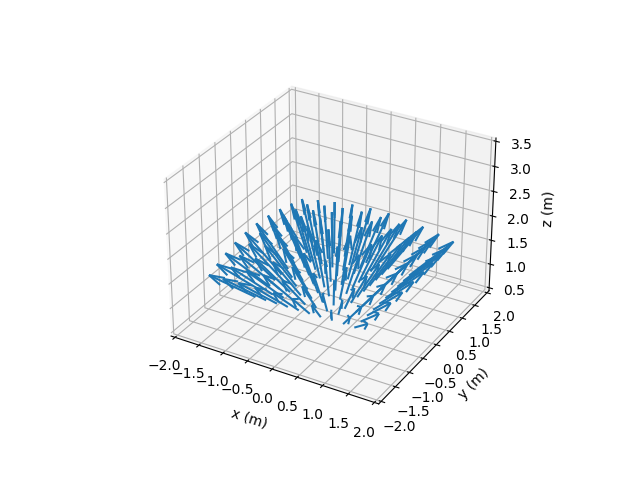

(0.5, 3.5)


In [13]:
""" Task 4: Make a quiver plot of the electric field over a planar surface per above directions. """

# create X, Y, Z values using generate_grid_centers per instructions above.

# generate electric field values at grid centers per specifications given above.

# display quiver plot

# import the 3D plotting functions from matplotlib
from mpl_toolkits.mplot3d import Axes3D


### BEGIN SOLUTION

Z = 1  # fixed x value (positive x face of cube)
xrange = np.linspace(-1, 1, 10)
yrange = np.linspace(-1, 1, 10)

X, Y = np.meshgrid(xrange, yrange)

Ex, Ey, Ez = point_charge_field(X,Y,Z, 0,0,0, q)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#scale = 1e9
ax.quiver(X, Y, Z, Ex, Ey, Ez, normalize=True)
ax.set_zlim3d(0.5, 3.5)
ax.set_ylim3d(-2.0, 2.0)
ax.set_xlim3d(-2.0, 2.0)
print(ax.get_zlim3d())
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_zlabel("z (m)")
plt.savefig("quiver_face.png")

#### END SOLUTION

In [14]:
""" Make sure your plot looks mostly like Dr. Zwickl's plot """

assert(True)

# Task 5: Define 6 functions that calculate the flux through the 6 sides of the cube.
The cube goes from +1 to -1 as in example above. The charge $q = 75 \mu\textrm{C}$ is located at $(x_q, y_q, z_q)$.

**Function names:**
1. `flux_x_pos` for the +x face
1. `flux_x_neg` for the -x face
1. `flux_y_pos` for the +y face
1. `flux_y_neg` for the -y face
1. `flux_z_pos` for the +z face
1. `flux_z_neg` for the -z face

**Inputs** 
* `xq` the x-position of the point charge
* `yq` the y-position of the point charge
* `zq` the z-position of the point charge
* `Nsteps` the number of grid steps

**Output**
* `flux_side` the total flux through that side of the cube

**Notes**
1. The functions will all be very similar, just change the key parts. You can use your calculation of flux on the top (z+ side) as a model for writing the function.
1. We are writing a function for each of the 6 sides because in the next class we will plot the flux through each face as a function of position of the charge. 

In [15]:
""" Define flux_x_pos() """

### BEGIN SOLUTION

def flux_x_pos(xq, yq, zq, Nsteps):
    X = 1  # fixed x value (positive x face of cube)
    yrange = np.linspace(-1, 1, Nsteps)
    zrange = np.linspace(-1, 1, Nsteps)

    Y, Z = np.meshgrid(yrange, zrange)

    # dA calculation
    dy = yrange[1] - yrange[0]
    dz = zrange[1] - zrange[0]
    dA = dy * dz

    # components of the normal vector
    nx = 1
    ny = 0
    nz = 0

    # same for all faces
    q = 75e-6

    # same for all faces
    Ex, Ey, Ez = point_charge_field(X,Y,Z, xq,yq,zq, q)

    # same for all faces
    Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

    #same for all faces
    flux_total = Dflux.sum()

    #print(flux_total)
    return(flux_total)

### END SOLUTION

In [16]:
""" Define flux_x_neg() """

### BEGIN SOLUTION

def flux_x_neg(xq, yq, zq, Nsteps):
    X = -1  # fixed x value (positive x face of cube)
    yrange = np.linspace(-1, 1, Nsteps)
    zrange = np.linspace(-1, 1, Nsteps)

    Y, Z = np.meshgrid(yrange, zrange)

    # dA calculation
    dy = yrange[1] - yrange[0]
    dz = zrange[1] - zrange[0]
    dA = dy * dz

    # components of the normal vector
    nx = -1
    ny = 0
    nz = 0

    # same for all faces
    q = 75e-6

    # same for all faces
    Ex, Ey, Ez = point_charge_field(X,Y,Z, xq,yq,zq, q)

    # same for all faces
    Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

    #same for all faces
    flux_total = Dflux.sum()

    #print(flux_total)
    return(flux_total)

### END SOLUTION

In [17]:
""" Define flux_y_pos() """

### BEGIN SOLUTION

def flux_y_pos(xq, yq, zq, Nsteps):
    xrange = np.linspace(-1, 1, Nsteps)  # fixed x value (positive x face of cube)
    Y = 1
    zrange = np.linspace(-1, 1, Nsteps)

    X, Z = np.meshgrid(xrange, zrange)

    # dA calculation
    dx = xrange[1] - xrange[0]
    dz = zrange[1] - zrange[0]
    dA = dx * dz

    # components of the normal vector
    nx = 0
    ny = 1
    nz = 0

    # same for all faces
    q = 75e-6

    # same for all faces
    Ex, Ey, Ez = point_charge_field(X,Y,Z, xq,yq,zq, q)

    # same for all faces
    Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

    #same for all faces
    flux_total = Dflux.sum()

    #print(flux_total)
    return(flux_total)

### END SOLUTION

In [18]:
""" Define flux_y_neg() """

### BEGIN SOLUTION

def flux_y_neg(xq, yq, zq, Nsteps):
    xrange = np.linspace(-1, 1, Nsteps)  # fixed x value (positive x face of cube)
    Y = -1
    zrange = np.linspace(-1, 1, Nsteps)

    X, Z = np.meshgrid(xrange, zrange)

    # dA calculation
    dx = xrange[1] - xrange[0]
    dz = zrange[1] - zrange[0]
    dA = dx * dz

    # components of the normal vector
    nx = 0
    ny = -1
    nz = 0

    # same for all faces
    q = 75e-6

    # same for all faces
    Ex, Ey, Ez = point_charge_field(X,Y,Z, xq,yq,zq, q)

    # same for all faces
    Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

    #same for all faces
    flux_total = Dflux.sum()

    #print(flux_total)
    return(flux_total)

### END SOLUTION

In [19]:
""" Define flux_z_pos() """

### BEGIN SOLUTION

def flux_z_pos(xq, yq, zq, Nsteps):
    xrange = np.linspace(-1, 1, Nsteps)  # fixed x value (positive x face of cube)
    yrange = np.linspace(-1, 1, Nsteps)
    Z = 1

    X, Y = np.meshgrid(xrange, yrange)

    # dA calculation
    dx = xrange[1] - xrange[0]
    dy = yrange[1] - yrange[0]
    dA = dx * dy

    # components of the normal vector
    nx = 0
    ny = 0
    nz = 1

    # same for all faces
    q = 75e-6

    # same for all faces
    Ex, Ey, Ez = point_charge_field(X,Y,Z, xq,yq,zq, q)

    # same for all faces
    Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

    #same for all faces
    flux_total = Dflux.sum()

    #print(flux_total)
    return(flux_total)

### END SOLUTION

In [20]:
""" Define flux_z_pos() """

### BEGIN SOLUTION

def flux_z_neg(xq, yq, zq, Nsteps):
    xrange = np.linspace(-1, 1, Nsteps)  # fixed x value (positive x face of cube)
    yrange = np.linspace(-1, 1, Nsteps)
    Z = -1

    X, Y = np.meshgrid(xrange, yrange)

    # dA calculation
    dx = xrange[1] - xrange[0]
    dy = yrange[1] - yrange[0]
    dA = dx * dy

    # components of the normal vector
    nx = 0
    ny = 0
    nz = -1

    # same for all faces
    q = 75e-6

    # same for all faces
    Ex, Ey, Ez = point_charge_field(X,Y,Z, xq,yq,zq, q)

    # same for all faces
    Dflux = (Ex * nx + Ey * ny + Ez * nz)*dA

    #same for all faces
    flux_total = Dflux.sum()

    #print(flux_total)
    return(flux_total)


# Print out some test conditions
xq = 0; yq = 0; zq = 0; Nsteps = 1000
print( flux_x_pos(xq, yq, zq, Nsteps) )
print( flux_x_neg(xq, yq, zq, Nsteps) )
print( flux_y_pos(xq, yq, zq, Nsteps) )
print( flux_y_neg(xq, yq, zq, Nsteps) )

print( flux_z_pos(xq, yq, zq, Nsteps) )
print( flux_z_neg(xq, yq, zq, Nsteps) )

### END SOLUTION

1413319.4084392565
1413319.4084392565
1413319.4084392565
1413319.4084392565
1413319.4084392565
1413319.4084392565


In [21]:
""" Test cases for the 6 functions that calculate flux through each of 6 sides """
xq = 0; yq = 0; zq = 0; Nsteps = 1000
assert abs(flux_x_pos(xq, yq, zq, Nsteps) - 1411761)/1411761 < 1e-2
assert abs(flux_x_neg(xq, yq, zq, Nsteps) - 1411761)/1411761 < 1e-2
assert abs(flux_y_pos(xq, yq, zq, Nsteps) - 1411761)/1411761 < 1e-2
assert abs(flux_y_neg(xq, yq, zq, Nsteps) - 1411761)/1411761 < 1e-2
assert abs(flux_z_pos(xq, yq, zq, Nsteps) - 1411761)/1411761 < 1e-2
assert abs(flux_z_neg(xq, yq, zq, Nsteps) - 1411761)/1411761 < 1e-2


# Task 6: Create a function `flux_cube_total()` 

Use the six functions defined in Task 5 within your definition of this function.

**Name:**  `flux_cube_total()`

**Inputs**
* `xq` - x-position of the charge
* `yq` - y-position of the charge
* `zq` - z-position of the charge
* `Nsteps` - step size on each axis of grid. Total number grid points is $N_\textrm{steps}\times N_\textrm{steps}$.

**Outputs**
* `flux_total` - the total flux through all 6 faces.

The function `flux_cube_total()` should use the 6 functions for each face.

**Note:** You can split a long calculation over multiple lines by using a backslash character "\".

    a = \
    3 + 5 \
    + 6 + 7

In [22]:
""" Define the function flux_cube_total() """

### BEGIN SOLUTION

def flux_cube_total(xq, yq, zq, Nsteps) :
    flux_total  = \
    flux_x_pos(xq, yq, zq, Nsteps) + flux_x_neg(xq, yq, zq, Nsteps) +  \
    flux_y_pos(xq, yq, zq, Nsteps) + flux_y_neg(xq, yq, zq, Nsteps) +  \
    flux_z_pos(xq, yq, zq, Nsteps) + flux_z_neg(xq, yq, zq, Nsteps)
    return flux_total

# END SOLUTION

In [23]:
""" Test cases for flux_cube_total() function """

assert abs ( flux_cube_total(2,0,0,1000)/ 8470568 ) < 0.01 
assert abs ( flux_cube_total(0,-2,0,1000)/ 8470568 ) < 0.01 
assert abs ( flux_cube_total(0,0,0,1000) -  8470568)/ 8470568 < 0.01
assert abs ( flux_cube_total(0.5,0.5,0.5,1000) -  8470568)/ 8470568 < 0.01

#  Task 7: Print the output from some special cases to 
Demonstrate that the `flux_cube_total` function agrees closely with Gauss's law
1. when the charge is inside the cube at the center.
1. when the charge is inside the cube, but not at the center.
1. when the charge is outside the cube

Show in each case that the result is accurate with 2% error. 

In [24]:
""" Task 7: Put your test calculations for flux_cube_total here """

### BEGIN SOLUTION

print(flux_cube_total(2,0,0,1000)/ 8470568 )

### END SOLUTION

0.00018134071669622222


#### Discuss your results  for Task 7 here.

# Task 8 (Bonus): Examining the convergence of the flux integral
Create two plots showing the convergence of the flux calculation through the cube. The number of steps $N_\textrm{steps}$ should vary over 2+ order of magnitudes.
1. Show the total output value of `flux_cube_total` as a function of $N_\textrm{steps}$.
1. Show the percent error relative to exact flux value as a function of $N_\textrm{steps}$.


**Hints:**
* You will probably have to use a loop over the range of varying `Nsteps` values.
* np.logspace() can be used to generate logarithmically spaced values that span a wide range of magnitudes. See the official documentation to check what the inputs are.
* plt.loglog() and plt.semilogy() and plt.semilogx() are used to put an axis on log scales.

![Example of convergence plot](Convergence.png)


<IPython.core.display.Javascript object>


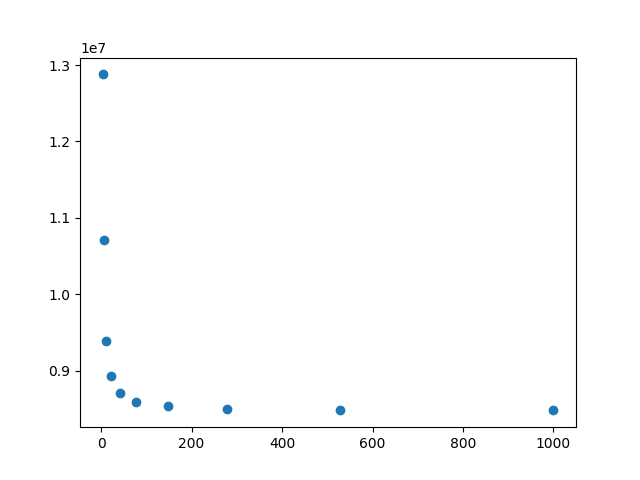

<IPython.core.display.Javascript object>


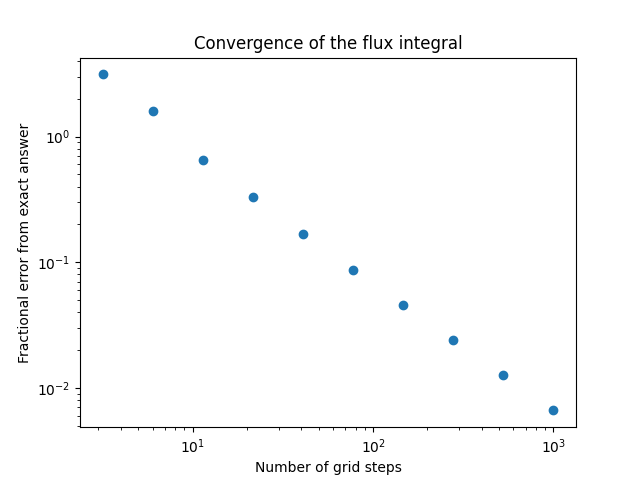

Text(0.5, 1.0, 'Convergence of the flux integral')

In [25]:
""" Create plots showing the convergence """


### BEGIN SOLUTION

Nlist = np.logspace(.5,3,10)

fluxlist = []

for Nsteps in Nlist :
    N = int(Nsteps)
    #print(N)
    fluxlist.append( flux_cube_total(0,0,0, N) )
    
fluxlist = np.array(fluxlist)

plt.figure()
plt.plot(Nlist, fluxlist, 'o')

# calculate error

error = (fluxlist - q/epsilon_0)/( q/epsilon_0/6 )

plt.figure()
plt.loglog(Nlist, error, 'o')
plt.xlabel("Number of grid steps")
plt.ylabel("Fractional error from exact answer")
plt.title("Convergence of the flux integral")
#plt.savefig("Convergence.png")

### END SOLUTION